In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch import nn

In [3]:
frames = {}

for i in range(1, 14):
    try:
        frames[i] = pd.read_csv(f"Data/fake_returns_GAN_{i}.csv") \
        .drop("Unnamed: 0", axis=1)
    except:
        print(f"error on {i}")





In [4]:
frames

{1:             0         1         2         3         4
 0    0.021603 -0.031696 -0.012839 -0.031183 -0.008217
 1    0.021603 -0.031696 -0.012839 -0.031183 -0.008217
 2    0.021603 -0.031696 -0.012839 -0.031183 -0.008217
 3    0.021603 -0.031696 -0.012839 -0.031183 -0.008217
 4    0.021603 -0.031696 -0.012839 -0.031183 -0.008217
 ..        ...       ...       ...       ...       ...
 995  0.021603 -0.031696 -0.012839 -0.031183 -0.008217
 996  0.021603 -0.031696 -0.012839 -0.031183 -0.008217
 997  0.021603 -0.031696 -0.012839 -0.031183 -0.008217
 998  0.021603 -0.031696 -0.012839 -0.031183 -0.008217
 999  0.021603 -0.031696 -0.012839 -0.031183 -0.008217
 
 [1000 rows x 5 columns],
 2:             0         1         2         3         4
 0   -0.054898  0.024967 -0.011626  0.059675  0.045430
 1   -0.057223  0.009567 -0.011645  0.068605  0.052272
 2   -0.060574  0.016146 -0.010619  0.070883  0.046870
 3   -0.058265  0.008339 -0.007094  0.069050  0.052057
 4   -0.055987  0.021763 -0.007

In [5]:
df = frames[12]
df

,0,1,2,3,4
0,5481.5957,-5736.0527,5599.8535,5862.9050,-5341.7640
1,5780.2314,-6063.0444,5913.3926,6196.9053,-5640.7207
2,5351.1270,-5597.4490,5465.6880,5720.8250,-5213.3916
3,5196.3020,-5441.0054,5311.2500,5559.5350,-5064.3250
4,5681.8300,-5963.7740,5815.7840,6094.7974,-5545.6055
...,...,...,...,...,...
995,5645.8300,-5920.5040,5775.1094,6051.3630,-5509.8010
996,5583.7490,-5865.8994,5717.5596,5991.8066,-5447.5000
997,5925.9510,-6224.3203,6066.8520,6360.7960,-5786.5750
998,5751.5366,-6040.7730,5888.6304,6172.8325,-5613.5120


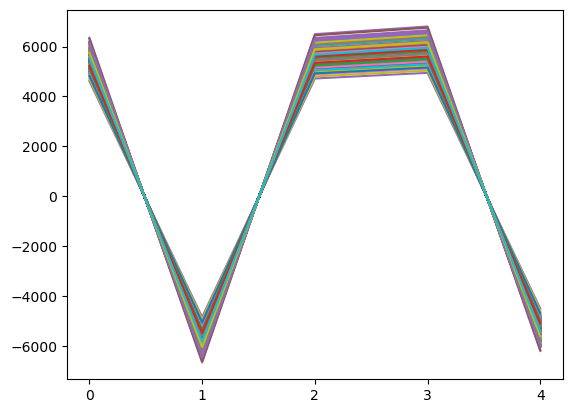

In [6]:
plt.plot(df.T)
plt.show()

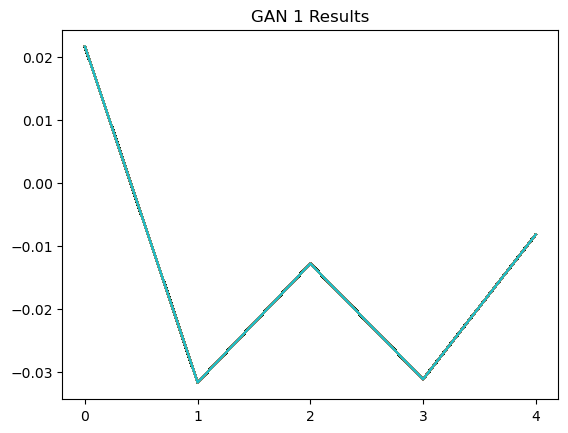

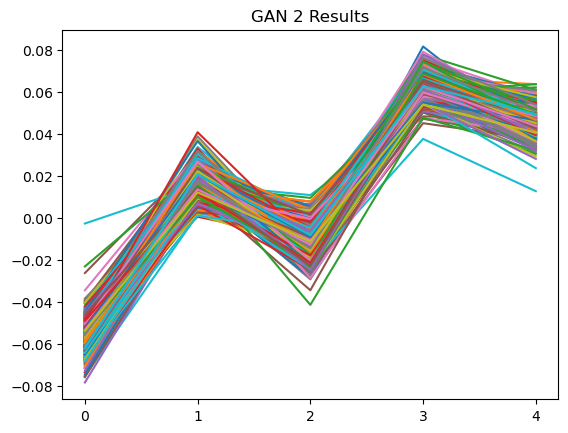

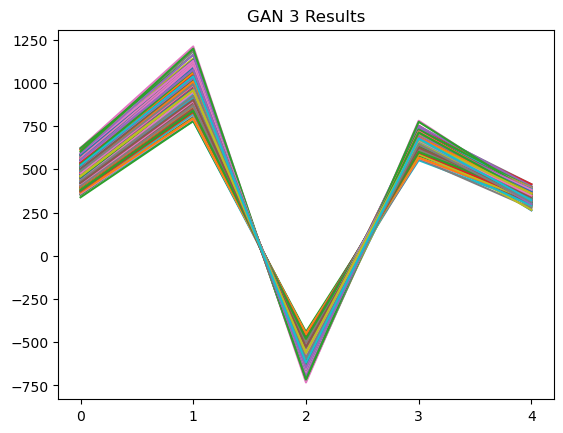

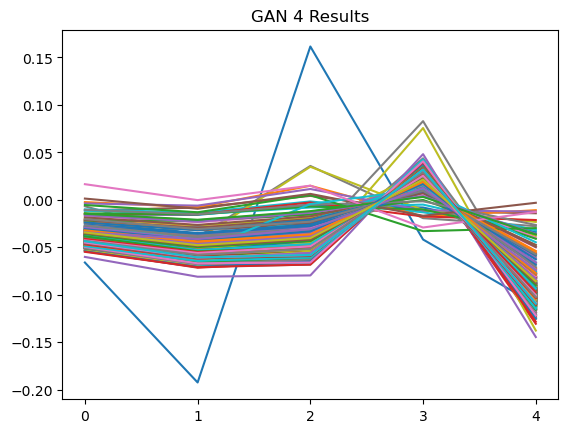

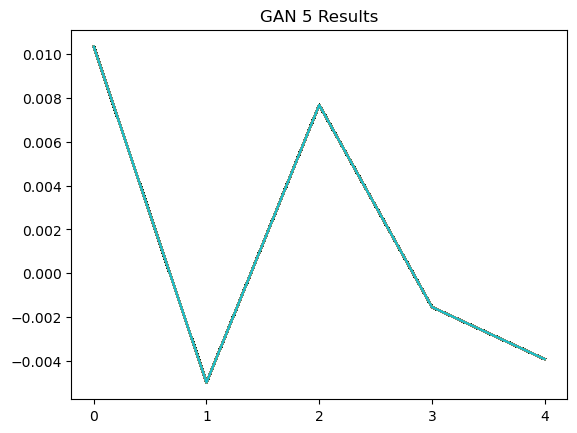

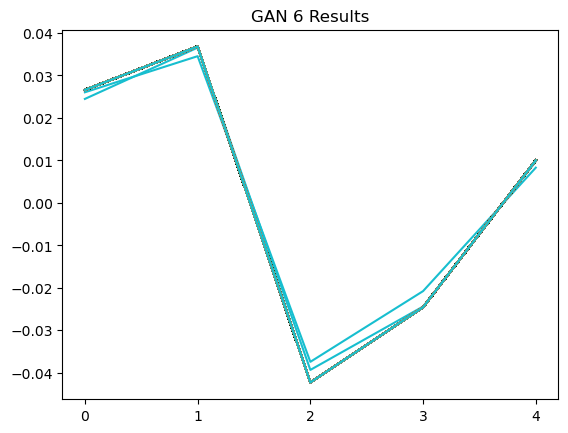

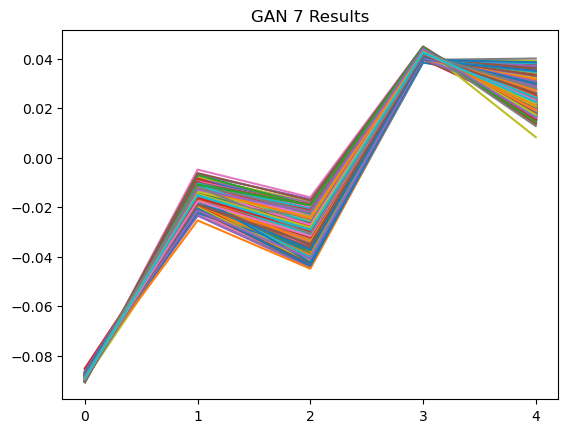

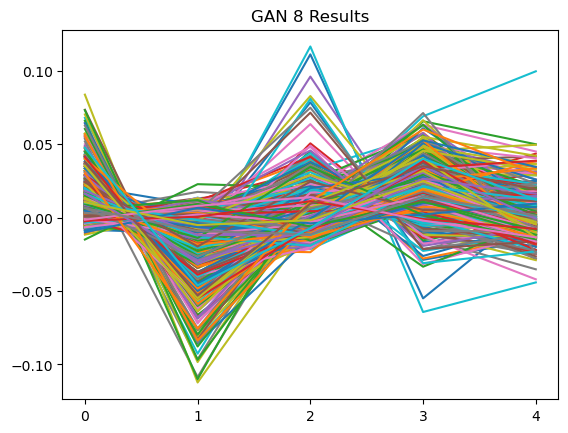

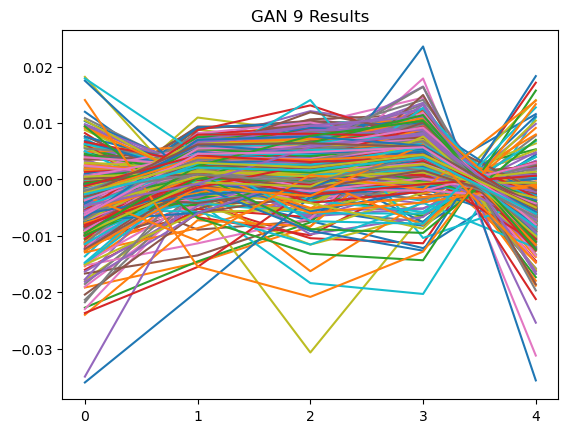

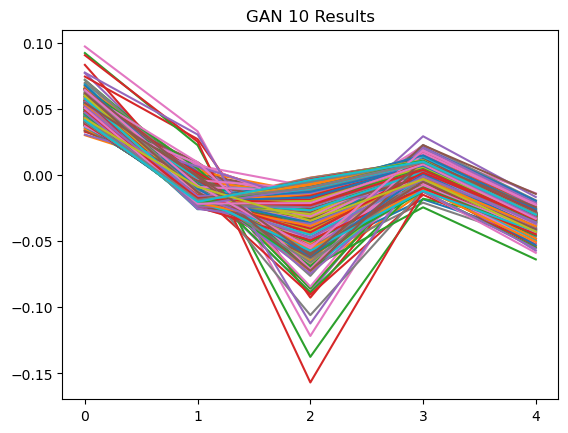

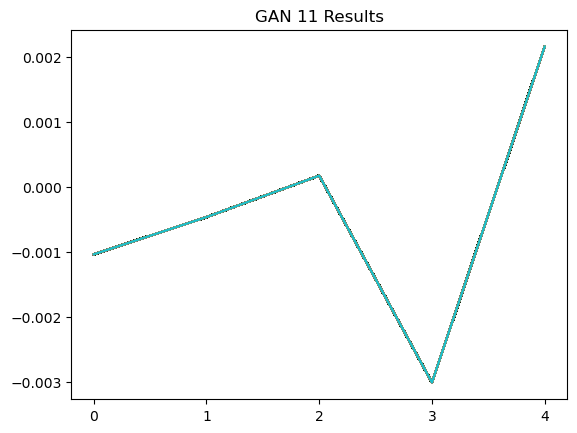

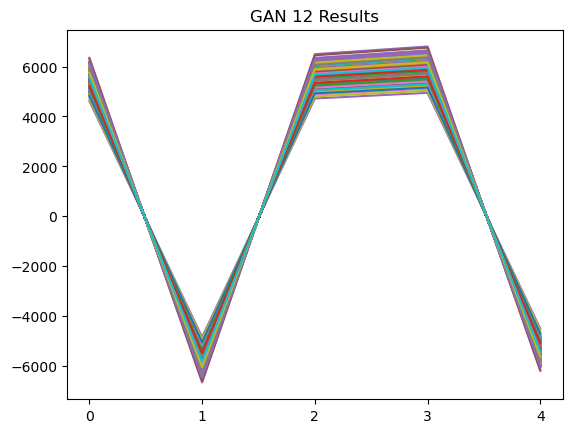

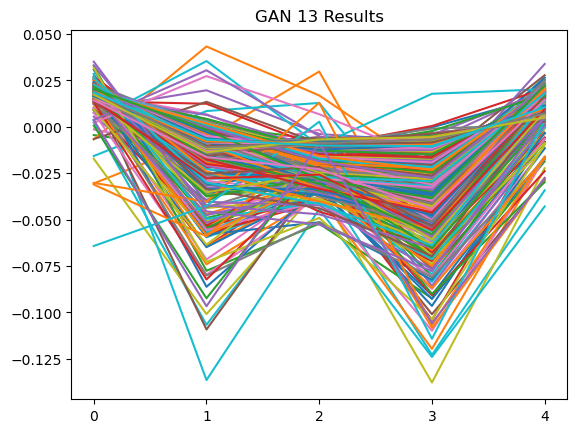

In [9]:
for i, df in frames.items():
    plt.plot(df.T)
    plt.title(f"GAN {i} Results")
    plt.show()

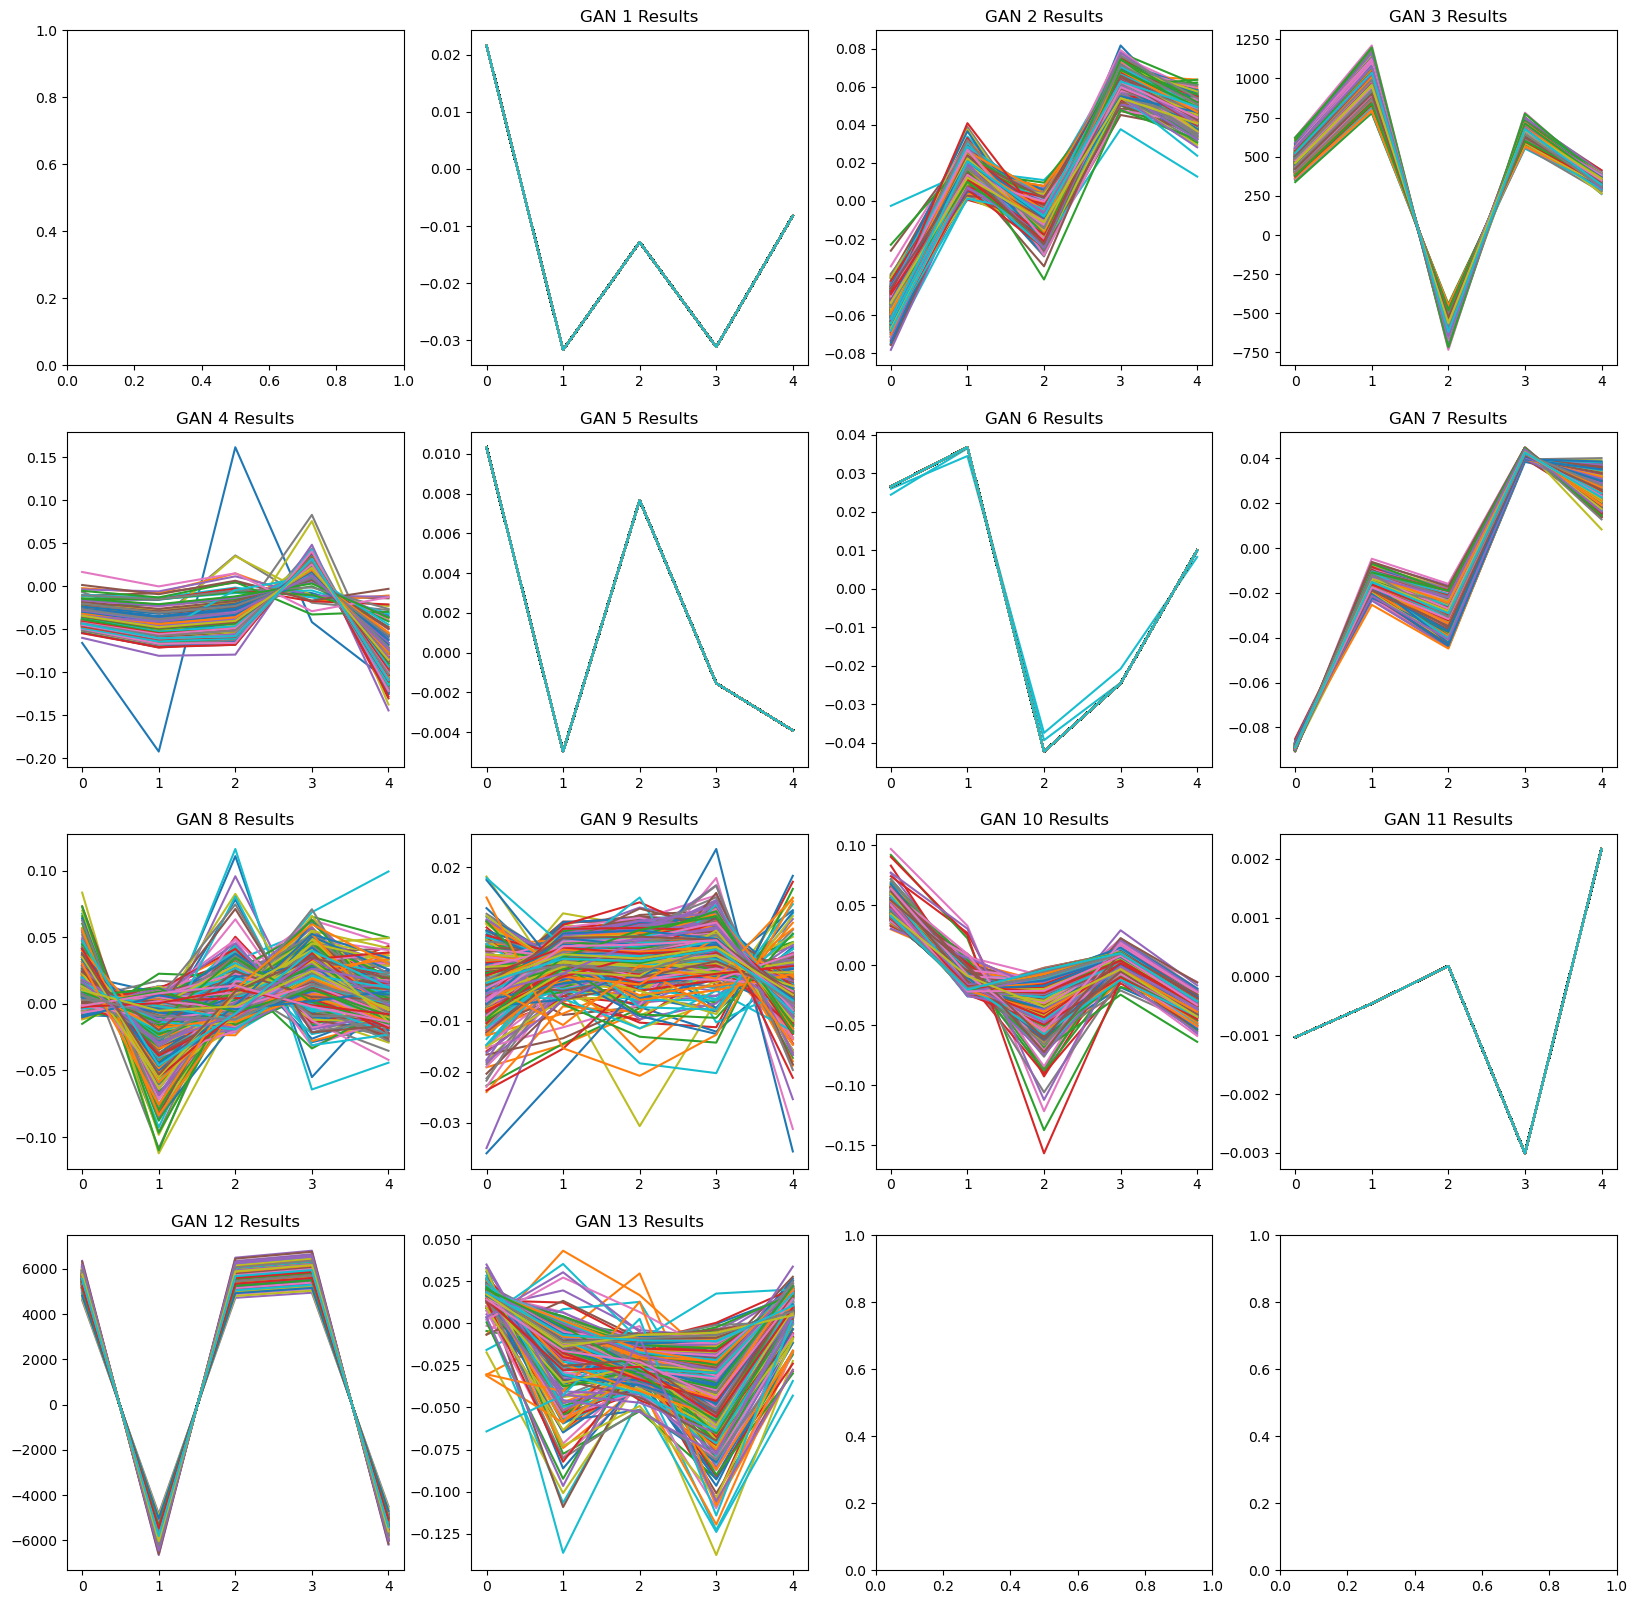

In [10]:
# subplots of the 13 GANs
fig, axs = plt.subplots(4, 4, figsize=(20, 20))
for i, df in frames.items():
    axs[i//4, i%4].plot(df.T)
    axs[i//4, i%4].set_title(f"GAN {i} Results")
plt.show()


In [46]:
frames[1]

,0,1,2,3,4,label
0,0.021603,-0.031696,-0.012839,-0.031183,-0.008217,0
1,0.021603,-0.031696,-0.012839,-0.031183,-0.008217,0
2,0.021603,-0.031696,-0.012839,-0.031183,-0.008217,0
3,0.021603,-0.031696,-0.012839,-0.031183,-0.008217,0
4,0.021603,-0.031696,-0.012839,-0.031183,-0.008217,0
...,...,...,...,...,...,...
995,0.021603,-0.031696,-0.012839,-0.031183,-0.008217,0
996,0.021603,-0.031696,-0.012839,-0.031183,-0.008217,0
997,0.021603,-0.031696,-0.012839,-0.031183,-0.008217,0
998,0.021603,-0.031696,-0.012839,-0.031183,-0.008217,0


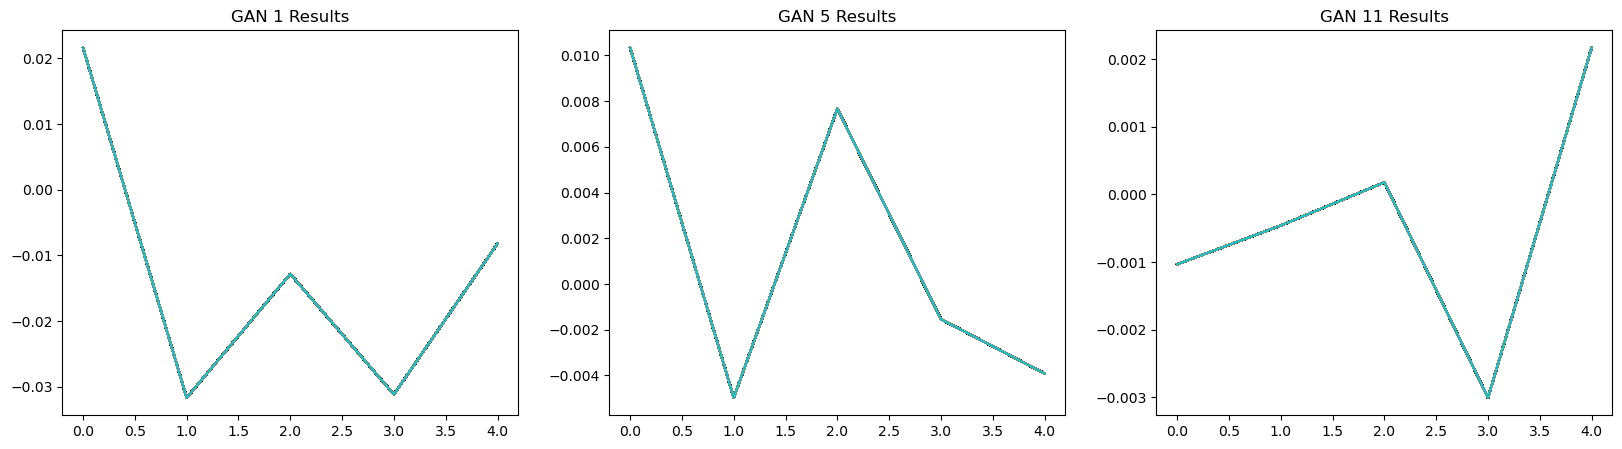

In [47]:
# plot gan 1, 5, and 11 next to each other
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].plot(frames[1].drop('label', axis=1).T)
axs[0].set_title("GAN 1 Results")
axs[1].plot(frames[5].drop('label', axis=1).T)
axs[1].set_title("GAN 5 Results")
axs[2].plot(frames[11].drop('label', axis=1).T)
axs[2].set_title("GAN 11 Results")
plt.show()

In [23]:
# compare performance with lightgbm, xgboost, and random forest
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score

def evaluate_performance(model, real, fake, test_size=0.2, cv=5, random_state=0):
    """
    Evaluate the performance of a model on a dataset of fake and real returns.
    """

    fake['label'] = 0
    real['label'] = 1
    fake.columns = real.columns

    data = pd.concat([real, fake], axis=0)
    
    X = data.drop("label", axis=1)
    y = data["label"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # fit the model
    model.fit(X_train, y_train)
    
    # get the predictions
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    conf = confusion_matrix(y_test, y_pred)
    cv_score = cross_val_score(model, X, y, cv=cv)
    
    return accuracy, conf, cv_score

In [14]:
real_total = pd.read_csv("Data/real_returns.csv").drop("Unnamed: 0", axis=1).T
print(real_total.shape)
real_total.head()

(49636, 5)


,0,1,2,3,4
0,-0.015061,0.000583,0.005816,0.001912,-0.002144
1,-0.067705,-0.020872,0.043075,0.007002,-0.000873
2,0.018355,0.010048,-0.011197,0.003540,-0.009258
3,0.000220,-0.011784,0.011652,0.013388,0.026251
4,0.004243,0.002334,-0.017521,0.017447,0.006675


In [15]:
# randomly sample 1000 rows from the real returns
real = real_total.sample(1000, random_state=0)

In [25]:
import lightgbm as lgb

for i, fake in frames.items():
    print(f"GAN {i} Results")
    acc, conf, cv = evaluate_performance(lgb.LGBMClassifier(), real, fake)
    print(f"Accuracy: {acc}")
    print(f"Confusion Matrix:\n{conf}")
    print(f"Cross Validation Score: {cv}")
    print('\n\n\n')

GAN 1 Results
Accuracy: 1.0
Confusion Matrix:
[[200   0]
 [  0 200]]
Cross Validation Score: [0.9975 1.     1.     1.     1.    ]




GAN 2 Results
Accuracy: 1.0
Confusion Matrix:
[[200   0]
 [  0 200]]
Cross Validation Score: [0.9925 0.9975 0.995  0.995  1.    ]




GAN 3 Results
Accuracy: 1.0
Confusion Matrix:
[[200   0]
 [  0 200]]
Cross Validation Score: [1. 1. 1. 1. 1.]




GAN 4 Results
Accuracy: 0.985
Confusion Matrix:
[[197   3]
 [  3 197]]
Cross Validation Score: [0.9975 0.99   0.995  0.9825 0.995 ]




GAN 5 Results
Accuracy: 1.0
Confusion Matrix:
[[200   0]
 [  0 200]]
Cross Validation Score: [1. 1. 1. 1. 1.]




GAN 6 Results
Accuracy: 1.0
Confusion Matrix:
[[200   0]
 [  0 200]]
Cross Validation Score: [1.     0.9975 1.     1.     1.    ]




GAN 7 Results
Accuracy: 1.0
Confusion Matrix:
[[200   0]
 [  0 200]]
Cross Validation Score: [0.9975 1.     0.9975 0.9975 1.    ]




GAN 8 Results
Accuracy: 0.905
Confusion Matrix:
[[180  20]
 [ 18 182]]
Cross Validation Score: [0.95

In [30]:
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore")

for i, fake in frames.items():
    print(f"GAN {i} Results")
    acc, conf, cv = evaluate_performance(xgb.XGBClassifier(), real, fake)
    print(f"Accuracy: {acc}")
    print(f"Confusion Matrix:\n{conf}")
    print(f"Cross Validation Score: {cv}")
    print('\n\n\n') 

GAN 1 Results
[18:48:25] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:48:25] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:48:25] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:48:25] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to rest

In [40]:
table = pd.DataFrame()
for i, fake in frames.items():
    acc, conf, cv = evaluate_performance(lgb.LGBMClassifier(), real, fake, cv=20)
    table[f"GAN {i}"] = [cv.mean(), cv.std()]
    

table

,GAN 1,GAN 2,GAN 3,GAN 4,GAN 5,GAN 6,GAN 7,GAN 8,GAN 9,GAN 10,GAN 11,GAN 12,GAN 13
0,0.999500,0.997500,1.0,0.990000,0.999500,0.998500,1.0,0.925000,0.966000,0.99750,0.999500,1.0,0.986500
1,0.002179,0.005362,0.0,0.008944,0.002179,0.003571,0.0,0.030903,0.015937,0.00433,0.002179,0.0,0.009097


In [41]:
table.index = ["mean", "std"]

In [42]:
# first 6 GANs
table.iloc[:, :7]

,GAN 1,GAN 2,GAN 3,GAN 4,GAN 5,GAN 6,GAN 7
mean,0.999500,0.997500,1.0,0.990000,0.999500,0.998500,1.0
std,0.002179,0.005362,0.0,0.008944,0.002179,0.003571,0.0


In [43]:
table.iloc[:, 7:]

,GAN 8,GAN 9,GAN 10,GAN 11,GAN 12,GAN 13
mean,0.925000,0.966000,0.99750,0.999500,1.0,0.986500
std,0.030903,0.015937,0.00433,0.002179,0.0,0.009097


In [49]:
real

,0,1,2,3,4,label
19429,-0.023021,-0.016436,0.073905,-0.016852,-0.084413,1
43883,0.012181,0.056342,0.017618,0.034101,0.008518,1
1120,-0.056771,0.017629,0.019790,0.010415,0.005085,1
36746,-0.035384,0.003580,0.003102,-0.030907,0.022665,1
24114,0.015614,0.055608,0.078135,0.014677,0.049507,1
...,...,...,...,...,...,...
8763,-0.003305,0.006599,0.001081,-0.002207,0.003935,1
42016,-0.003821,-0.028532,0.009884,-0.003227,0.006951,1
3240,-0.001525,0.023853,0.016392,0.010473,-0.001188,1
28815,0.000876,-0.006371,0.006700,0.008719,0.001627,1


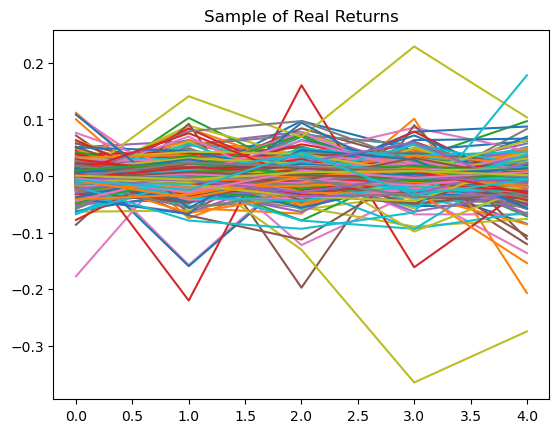

In [52]:
plt.plot(real.drop('label', axis=1).T)
plt.title("Sample of Real Returns")
plt.show()